### Importing the important Libraries

In [1]:
import sys
sys.path.append('../')  # Add the parent directory to the system path

In [2]:
from src.data_preprocessing import DataPreprocessing
from src.models import Model
from src.evaluate import Evaluation
from src.evaluate import Visualize

import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.discard('no')

/Users/mansipandya/anaconda3/envs/knidianmd/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mansipandya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## List of sentence-transformers I'm gonna experiment with

1) 'sentence-transformers/multi-qa-mpnet-base-dot-v1'
2) 'sentence-transformers/all-MiniLM-L12-v2'
3) 'sentence-transformers/all-MiniLM-L6-v2'
4) ''sentence-transformers/all-mpnet-base-v2''
5) 'paraphrase-multilingual-MiniLM-L12-v2'
6) 'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'
7) 'sentence-transformers/LaBSE'
8) 'sentence-transformers/multi-qa-mpnet-base-dot-v1'
9) 'sentence-transformers/distiluse-base-multilingual-cased-v2'
10) 'sentence-transformers/paraphrase-MiniLM-L6-v2'


## Code to Experiment with the models mentioned above

#### Preprocessing Symptoms and Test Cases

In [18]:
#initializing the DataPreprocessing class and getting symptoms, vocab. itindx
data = DataPreprocessing()
symptoms, vocab, itindx = data.preprocess_symptoms()

In [19]:
# initializing the test cases
df = pd.read_csv('/Users/mansipandya/Desktop/KnidianMD/data/test_cases.csv')
df['Processed_Medical_History'] = df['medical_history'].apply(data.preprocess_medical_history, stop_words=stop_words)

In [20]:
df

,medical_history,symptoms,Processed_Medical_History
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...


### Model Definition

In [21]:
model = Model()

In [15]:
hugging_face_models = [
    'sentence-transformers/multi-qa-mpnet-base-dot-v1',
    'sentence-transformers/all-MiniLM-L12-v2',
    'sentence-transformers/all-MiniLM-L6-v2',
    'sentence-transformers/all-mpnet-base-v2',
    'paraphrase-multilingual-MiniLM-L12-v2',
    'sentence-transformers/paraphrase-multilingual-mpnet-base-v2',
    'sentence-transformers/LaBSE',
    'sentence-transformers/multi-qa-mpnet-base-dot-v1',
    'sentence-transformers/distiluse-base-multilingual-cased-v2',
    'sentence-transformers/paraphrase-MiniLM-L6-v2'
]


In [23]:
# for each_model in hugging_face_models:
#     df[each_model] = df['Processed_Medical_History'].apply(lambda x: model.trad_ss(x[0], symptoms, vocab, itindx, each_model))

config_sentence_transformers.json: 100%|██████████| 122/122 [00:00<00:00, 440kB/s]
README.md: 100%|██████████| 2.22k/2.22k [00:00<00:00, 16.7MB/s]
sentence_bert_config.json: 100%|██████████| 53.0/53.0 [00:00<00:00, 114kB/s]
config.json: 100%|██████████| 804/804 [00:00<00:00, 5.12MB/s]
pytorch_model.bin: 100%|██████████| 1.88G/1.88G [00:33<00:00, 55.4MB/s]
tokenizer_config.json: 100%|██████████| 397/397 [00:00<00:00, 937kB/s]
vocab.txt: 100%|██████████| 5.22M/5.22M [00:00<00:00, 9.48MB/s]
tokenizer.json: 100%|██████████| 9.62M/9.62M [00:00<00:00, 20.7MB/s]
2_Dense/config.json: 100%|██████████| 114/114 [00:00<00:00, 865kB/s]
pytorch_model.bin: 100%|██████████| 2.36M/2.36M [00:00<00:00, 18.2MB/s]
config_sentence_transformers.json: 100%|██████████| 122/122 [00:00<00:00, 1.40MB/s]
README.md: 100%|██████████| 2.69k/2.69k [00:00<00:00, 26.2MB/s]
sentence_bert_config.json: 100%|██████████| 53.0/53.0 [00:00<00:00, 32.2kB/s]
config.json: 100%|██████████| 610/610 [00:00<00:00, 6.91MB/s]
pytorch_m

In [24]:
df

,medical_history,symptoms,Processed_Medical_History,sentence-transformers/multi-qa-mpnet-base-dot-v1,sentence-transformers/all-MiniLM-L12-v2,sentence-transformers/all-MiniLM-L6-v2,sentence-transformers/all-mpnet-base-v2,paraphrase-multilingual-MiniLM-L12-v2,sentence-transformers/paraphrase-multilingual-mpnet-base-v2,sentence-transformers/LaBSE,sentence-transformers/distiluse-base-multilingual-cased-v2,sentence-transformers/paraphrase-MiniLM-L6-v2
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...,"{450: 'limited motion of range', 1562: 'swelli...","{862: 'low neutrophil count', 450: 'range of j...","{450: 'range of joint movement reduced', 862: ...","{2612: 'hip limite range of motion', 450: 'ran...","{1109: 'pain in unspecified knee', 4427: 'knee...","{450: 'range of joint movement reduced', 2612:...","{2612: 'hip limite range of motion', 450: 'lim...","{2612: 'hip limite range of motion', 450: 'lim...","{4431: 'tenderness of knee joint.', 4432: 'kne..."
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...,"{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 4531: 'no abdominal ...","{3772: 'no bowel sounds', 15: 'tenderness; abd...","{3772: 'no bowel sounds', 15: 'tenderness; abd...","{3772: 'no bowel sounds', 4531: 'no abdominal ...","{3772: 'no bowel sounds', 4334: 'abdominal pai...","{3772: 'no bowel sounds', 822: 'decreased bowe..."


In [25]:
# df.to_pickle('/Users/mansipandya/Desktop/KnidianMD/checkpoints/df_st_pickle.pkl')

In [56]:
df = pd.read_pickle('/Users/mansipandya/Desktop/KnidianMD/checkpoints/df_st_pickle.pkl')

In [57]:
df

,medical_history,symptoms,Processed_Medical_History,sentence-transformers/multi-qa-mpnet-base-dot-v1,sentence-transformers/all-MiniLM-L12-v2,sentence-transformers/all-MiniLM-L6-v2,sentence-transformers/all-mpnet-base-v2,paraphrase-multilingual-MiniLM-L12-v2,sentence-transformers/paraphrase-multilingual-mpnet-base-v2,sentence-transformers/LaBSE,sentence-transformers/distiluse-base-multilingual-cased-v2,sentence-transformers/paraphrase-MiniLM-L6-v2
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...,"{450: 'limited motion of range', 1562: 'swelli...","{862: 'low neutrophil count', 450: 'range of j...","{450: 'range of joint movement reduced', 862: ...","{2612: 'hip limite range of motion', 450: 'ran...","{1109: 'pain in unspecified knee', 4427: 'knee...","{450: 'range of joint movement reduced', 2612:...","{2612: 'hip limite range of motion', 450: 'lim...","{2612: 'hip limite range of motion', 450: 'lim...","{4431: 'tenderness of knee joint.', 4432: 'kne..."
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...,"{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 4531: 'no abdominal ...","{3772: 'no bowel sounds', 15: 'tenderness; abd...","{3772: 'no bowel sounds', 15: 'tenderness; abd...","{3772: 'no bowel sounds', 4531: 'no abdominal ...","{3772: 'no bowel sounds', 4334: 'abdominal pai...","{3772: 'no bowel sounds', 822: 'decreased bowe..."


In [59]:
df

,medical_history,symptoms,Processed_Medical_History,sentence-transformers/multi-qa-mpnet-base-dot-v1,sentence-transformers/all-MiniLM-L12-v2,sentence-transformers/all-MiniLM-L6-v2,sentence-transformers/all-mpnet-base-v2,paraphrase-multilingual-MiniLM-L12-v2,sentence-transformers/paraphrase-multilingual-mpnet-base-v2,sentence-transformers/LaBSE,sentence-transformers/distiluse-base-multilingual-cased-v2,sentence-transformers/paraphrase-MiniLM-L6-v2
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...,"{450: 'limited motion of range', 1562: 'swelli...","{862: 'low neutrophil count', 450: 'range of j...","{450: 'range of joint movement reduced', 862: ...","{2612: 'hip limite range of motion', 450: 'ran...","{1109: 'pain in unspecified knee', 4427: 'knee...","{450: 'range of joint movement reduced', 2612:...","{2612: 'hip limite range of motion', 450: 'lim...","{2612: 'hip limite range of motion', 450: 'lim...","{4431: 'tenderness of knee joint.', 4432: 'kne..."
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...,"{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 4531: 'no abdominal ...","{3772: 'no bowel sounds', 15: 'tenderness; abd...","{3772: 'no bowel sounds', 15: 'tenderness; abd...","{3772: 'no bowel sounds', 4531: 'no abdominal ...","{3772: 'no bowel sounds', 4334: 'abdominal pai...","{3772: 'no bowel sounds', 822: 'decreased bowe..."


### Evaluating F1 Scores

In [60]:
evaluate = Evaluation()

In [3]:
hugging_face_models = [
    'sentence-transformers/multi-qa-mpnet-base-dot-v1',
    'sentence-transformers/all-MiniLM-L12-v2',
    'sentence-transformers/all-MiniLM-L6-v2',
    'sentence-transformers/all-mpnet-base-v2',
    'paraphrase-multilingual-MiniLM-L12-v2',
    'sentence-transformers/paraphrase-multilingual-mpnet-base-v2',
    'sentence-transformers/LaBSE',
    'sentence-transformers/multi-qa-mpnet-base-dot-v1',
    'sentence-transformers/distiluse-base-multilingual-cased-v2',
    'sentence-transformers/paraphrase-MiniLM-L6-v2'
]

In [82]:
for each_model in hugging_face_models:
    df[f'precision_{each_model}'], df[f'recall_{each_model}'], df[f'f1_{each_model}'] = zip(*df.apply(lambda row: evaluate.evaluate(row['symptoms'], row[each_model]), axis=1))

In [83]:
df

,medical_history,symptoms,Processed_Medical_History,sentence-transformers/multi-qa-mpnet-base-dot-v1,sentence-transformers/all-MiniLM-L12-v2,sentence-transformers/all-MiniLM-L6-v2,sentence-transformers/all-mpnet-base-v2,paraphrase-multilingual-MiniLM-L12-v2,sentence-transformers/paraphrase-multilingual-mpnet-base-v2,sentence-transformers/LaBSE,...,f1_sentence-transformers/paraphrase-multilingual-mpnet-base-v2,precision_sentence-transformers/LaBSE,recall_sentence-transformers/LaBSE,f1_sentence-transformers/LaBSE,precision_sentence-transformers/distiluse-base-multilingual-cased-v2,recall_sentence-transformers/distiluse-base-multilingual-cased-v2,f1_sentence-transformers/distiluse-base-multilingual-cased-v2,precision_sentence-transformers/paraphrase-MiniLM-L6-v2,recall_sentence-transformers/paraphrase-MiniLM-L6-v2,f1_sentence-transformers/paraphrase-MiniLM-L6-v2
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...,"{450: 'limited motion of range', 1562: 'swelli...","{862: 'low neutrophil count', 450: 'range of j...","{450: 'range of joint movement reduced', 862: ...","{2612: 'hip limite range of motion', 450: 'ran...","{1109: 'pain in unspecified knee', 4427: 'knee...","{450: 'range of joint movement reduced', 2612:...","{2612: 'hip limite range of motion', 450: 'lim...",...,"[0.25, 0.22222222222222224, 0.2, 0.18181818181...","[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16...","[0.0, 0.14285714285714285, 0.14285714285714285...","[0, 0.22222222222222224, 0.2, 0.18181818181818...","[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16...","[0.0, 0.14285714285714285, 0.14285714285714285...","[0, 0.22222222222222224, 0.2, 0.18181818181818...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285,...","[0, 0, 0, 0, 0, 0.15384615384615383, 0.1428571..."
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...,"{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{3772: 'no bowel sounds', 4531: 'no abdominal ...","{3772: 'no bowel sounds', 15: 'tenderness; abd...","{3772: 'no bowel sounds', 15: 'tenderness; abd...","{3772: 'no bowel sounds', 4531: 'no abdominal ...",...,"[0.2222222222222222, 0.4, 0.36363636363636365,...","[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.33...","[0.125, 0.125, 0.125, 0.125, 0.125, 0.25, 0.25...","[0.2222222222222222, 0.2, 0.18181818181818182,...","[1.0, 1.0, 0.6666666666666666, 0.5, 0.6, 0.5, ...","[0.125, 0.25, 0.25, 0.25, 0.375, 0.375, 0.375,...","[0.2222222222222222, 0.4, 0.36363636363636365,...","[1.0, 0.5, 0.6666666666666666, 0.5, 0.6, 0.5, ...","[0.125, 0.125, 0.25, 0.25, 0.375, 0.375, 0.375...","[0.2222222222222222, 0.2, 0.36363636363636365,..."


In [84]:
df.to_pickle('/Users/mansipandya/Desktop/KnidianMD/checkpoints/df_st_eval_pickle.pkl')

In [6]:
df = pd.read_pickle('/Users/mansipandya/Desktop/KnidianMD/checkpoints/df_st_eval_pickle.pkl')

### Visualizing F1 Score

In [7]:
visualize = Visualize()

<Figure size 640x480 with 0 Axes>

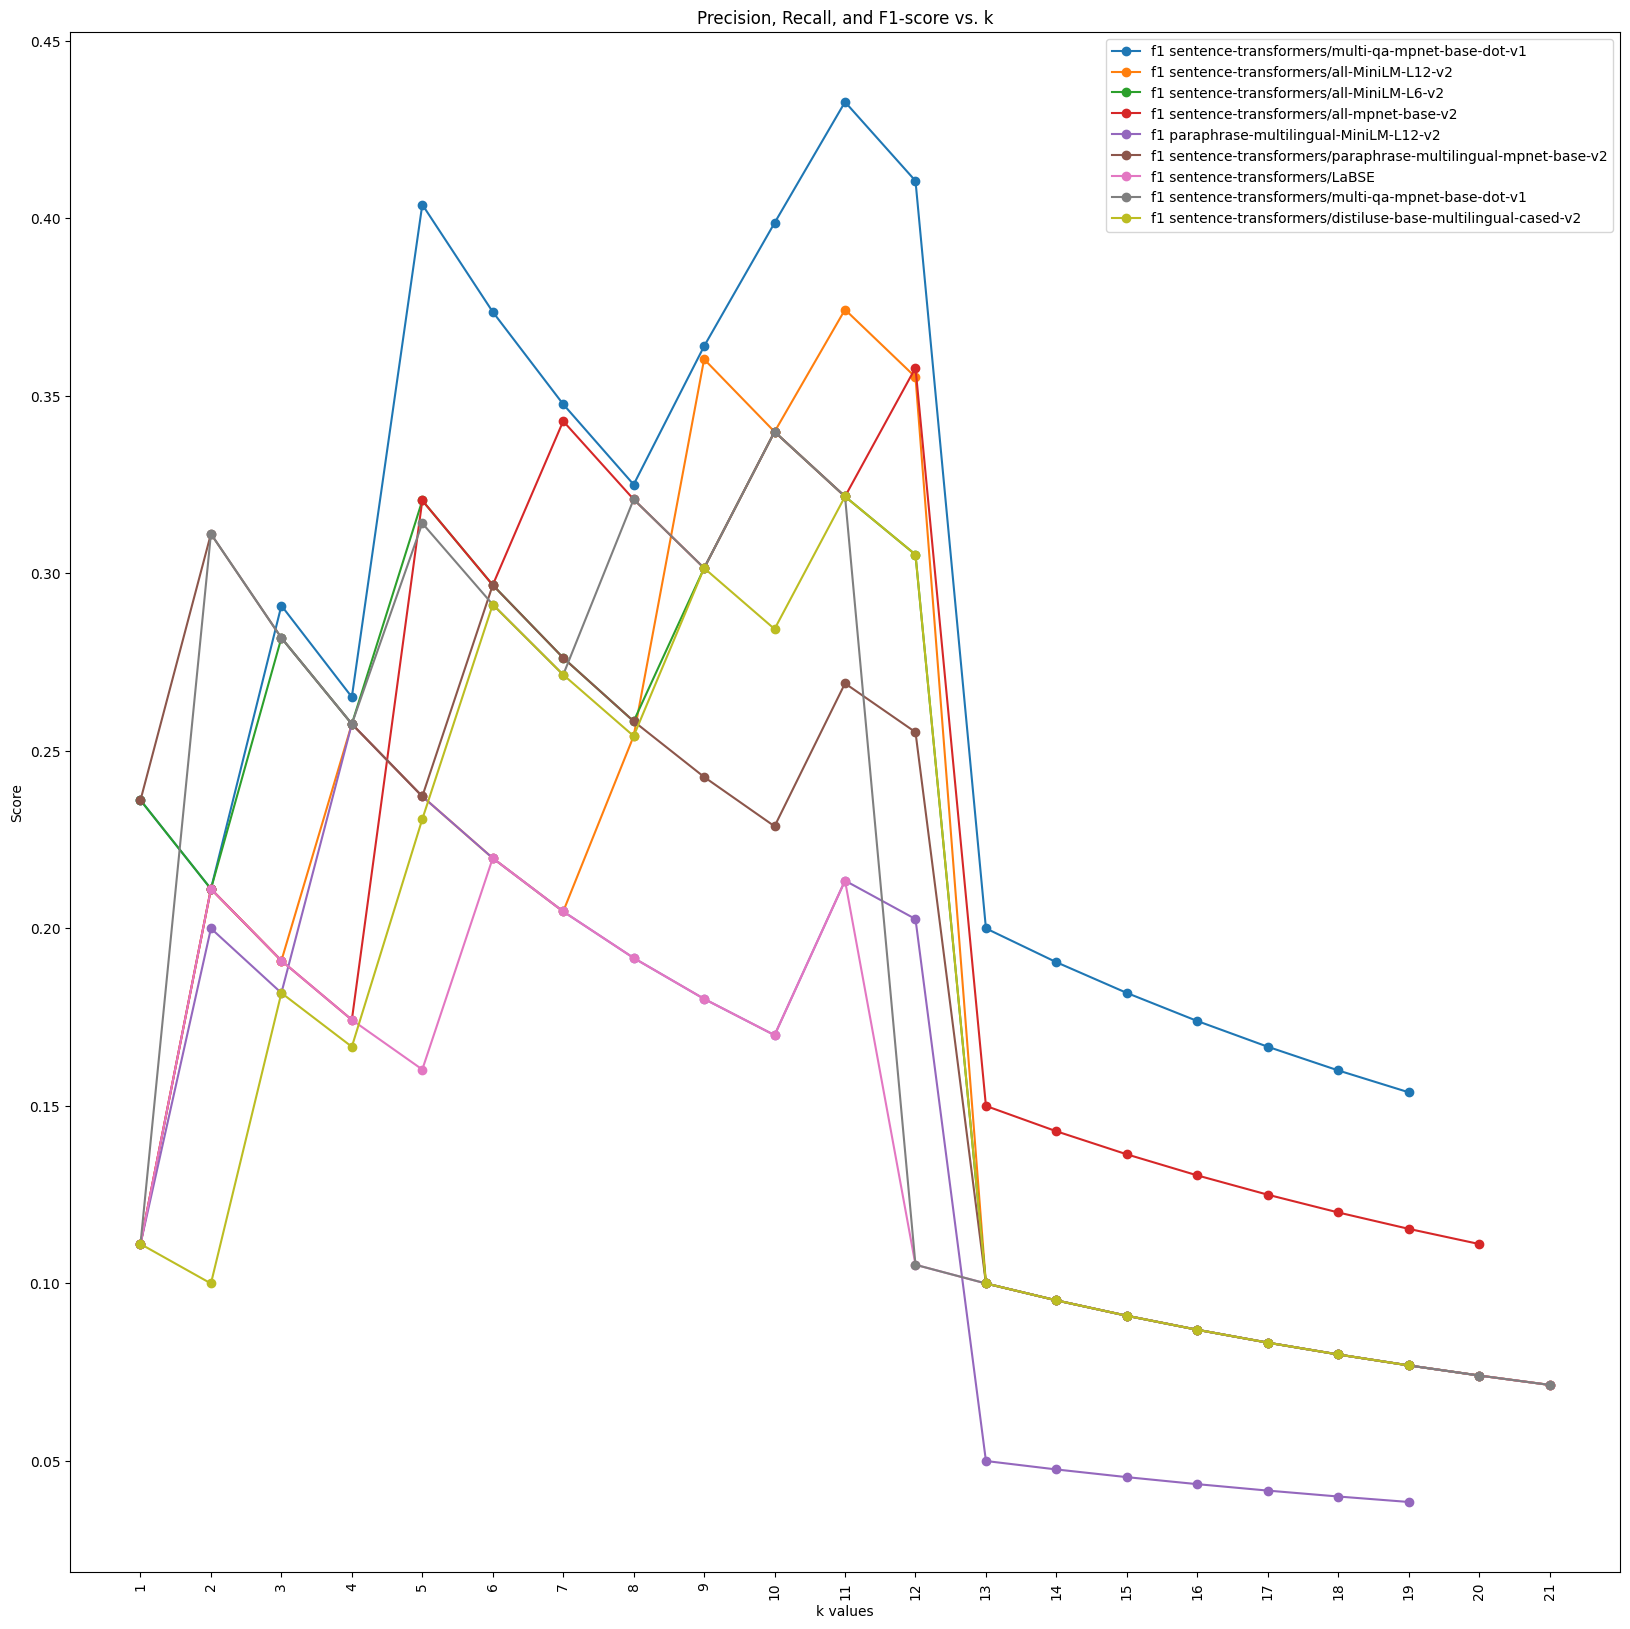

In [8]:
visualize.compare_metrics(df,hugging_face_models,metric_type='f1')